In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('datasets/atm.xlsx',dtype={'Bank_Name':str,'ATM_Address':str,'City':str,'Comission':str,'ATM_Type':str,'ATM_Location':str,'Handicap_Access':str})

In [3]:
df.drop('ATM_Address_Extra',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bank_Code        4047 non-null   int64  
 1   Bank_Name        4047 non-null   object 
 2   Branch_Code      4047 non-null   int64  
 3   Atm_Num          4047 non-null   int64  
 4   ATM_Address      4047 non-null   object 
 5   City             4047 non-null   object 
 6   Commission       4047 non-null   object 
 7   ATM_Type         4047 non-null   object 
 8   ATM_Location     4047 non-null   object 
 9   Handicap_Access  4047 non-null   object 
 10  X_Coordinate     4044 non-null   float64
 11  Y_Coordinate     4044 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 379.5+ KB


In [5]:
df['Bank_Code'].unique()

array([13, 14, 11, 31, 12,  4, 54, 10, 20, 46, 17, 52, 26], dtype=int64)

In [ ]:
import plotly.graph_objects as go

In [14]:
df=df[(df['X_Coordinate']<36) & (df['X_Coordinate']>29) & (df['Y_Coordinate']<36) & (df['Y_Coordinate']>29)]

In [15]:
df.describe()

,Bank_Code,Branch_Code,Atm_Num,X_Coordinate,Y_Coordinate
count,4036.000000,4036.000000,4.036000e+03,4036.000000,4036.000000
mean,16.587463,525.562686,1.068877e+07,32.139594,34.968416
std,11.791898,301.094778,3.480253e+07,0.521867,0.223105
min,4.000000,1.000000,1.100000e+01,29.550395,34.474500
25%,10.000000,186.000000,4.094750e+03,31.810539,34.800202
50%,12.000000,618.000000,7.574500e+03,32.075520,34.902110
75%,17.000000,746.000000,6.792600e+04,32.512730,35.146509
max,54.000000,999.000000,1.287472e+08,35.105130,35.808179


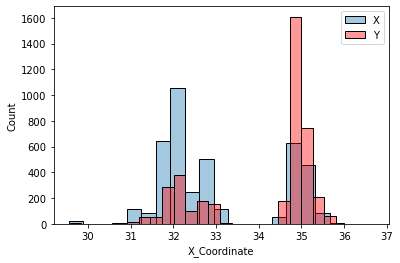

In [8]:
sns.set_style()
sns.histplot(df['X_Coordinate'],label='X',alpha=0.4)
sns.histplot(df['Y_Coordinate'],color='red',label='Y',alpha=0.4)
plt.legend()
plt.show()

In [16]:
conf_df=df[(df['X_Coordinate']>34) & (df['Y_Coordinate']<34)]
conf_df

,Bank_Code,Bank_Name,Branch_Code,Atm_Num,ATM_Address,City,Commission,ATM_Type,ATM_Location,Handicap_Access,X_Coordinate,Y_Coordinate


In [103]:
df['ATM_Location'].unique()

array(['על קיר הסניף', 'במרחק של יותר מ- 500 מטר מהסניף', 'בתוך הסניף',
       'במרחק של עד 500 מטר מהסניף'], dtype=object)

In [11]:
for idx,row in df[(df['X_Coordinate']>34) & (df['Y_Coordinate']<34)].iterrows():
    #print('Before: ','\n','ATM: ', row.Atm_Num,'\n','X: ', row.X_Coordinate,'\n','Y: ', row.Y_Coordinate)
    df['X_Coordinate'][idx]=conf_df.loc[idx,'Y_Coordinate']
    df['Y_Coordinate'][idx]=conf_df.loc[idx,'X_Coordinate']
    #print('After: ','\n','ATM: ', row.Atm_Num,'\n','X: ', df['X_Coordinate'][idx],'\n','Y: ', df['Y_Coordinate'][idx])
    
 

Before:  
 ATM:  731 
 X:  34.752276 
 Y:  32.012404
After:  
 ATM:  731 
 X:  32.012404 
 Y:  34.752276
Before:  
 ATM:  4220001 
 X:  34.825 
 Y:  32.1665
After:  
 ATM:  4220001 
 X:  32.1665 
 Y:  34.825
Before:  
 ATM:  4250001 
 X:  34.769 
 Y:  32.0495
After:  
 ATM:  4250001 
 X:  32.0495 
 Y:  34.769
Before:  
 ATM:  4220002 
 X:  34.825 
 Y:  32.1665
After:  
 ATM:  4220002 
 X:  32.1665 
 Y:  34.825
Before:  
 ATM:  3720008 
 X:  34.7797 
 Y:  32.0567
After:  
 ATM:  3720008 
 X:  32.0567 
 Y:  34.7797
Before:  
 ATM:  526503 
 X:  35.131 
 Y:  32.264
After:  
 ATM:  526503 
 X:  32.264 
 Y:  35.131
Before:  
 ATM:  3720009 
 X:  34.6518 
 Y:  31.8105
After:  
 ATM:  3720009 
 X:  31.8105 
 Y:  34.6518
Before:  
 ATM:  3720007 
 X:  34.7797 
 Y:  32.0567
After:  
 ATM:  3720007 
 X:  32.0567 
 Y:  34.7797
Before:  
 ATM:  3270009 
 X:  34.8497 
 Y:  32.1006
After:  
 ATM:  3270009 
 X:  32.1006 
 Y:  34.8497
Before:  
 ATM:  4250002 
 X:  34.769 
 Y:  32.0495
After:  
 ATM: 

C:\Users\shiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shiru\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Before:  
 ATM:  259 
 X:  35.2291 
 Y:  31.8507
After:  
 ATM:  259 
 X:  31.8507 
 Y:  35.2291
Before:  
 ATM:  152 
 X:  35.197959999999995 
 Y:  31.75739
After:  
 ATM:  152 
 X:  31.75739 
 Y:  35.197959999999995
Before:  
 ATM:  223 
 X:  34.75305 
 Y:  32.0511
After:  
 ATM:  223 
 X:  32.0511 
 Y:  34.75305
Before:  
 ATM:  114 
 X:  35.18731 
 Y:  31.75173
After:  
 ATM:  114 
 X:  31.75173 
 Y:  35.18731
Before:  
 ATM:  156 
 X:  34.56276 
 Y:  31.657740000000004
After:  
 ATM:  156 
 X:  31.657740000000004 
 Y:  34.56276
Before:  
 ATM:  188 
 X:  34.8166 
 Y:  31.864959999999996
After:  
 ATM:  188 
 X:  31.864959999999996 
 Y:  34.8166
Before:  
 ATM:  222 
 X:  35.119209999999995 
 Y:  31.80279
After:  
 ATM:  222 
 X:  31.80279 
 Y:  35.119209999999995
Before:  
 ATM:  189 
 X:  34.80923 
 Y:  32.047470000000004
After:  
 ATM:  189 
 X:  32.047470000000004 
 Y:  34.80923
Before:  
 ATM:  224 
 X:  34.82659 
 Y:  32.10048
After:  
 ATM:  224 
 X:  32.10048 
 Y:  34.82659

 Y:  32.775329
After:  
 ATM:  7911 
 X:  32.775329 
 Y:  35.378111
Before:  
 ATM:  8632 
 X:  34.764759999999995 
 Y:  32.017848
After:  
 ATM:  8632 
 X:  32.017848 
 Y:  34.764759999999995
Before:  
 ATM:  7903 
 X:  34.59367 
 Y:  31.417734000000003
After:  
 ATM:  7903 
 X:  31.417734000000003 
 Y:  34.59367
Before:  
 ATM:  7053 
 X:  35.074221 
 Y:  32.831744
After:  
 ATM:  7053 
 X:  32.831744 
 Y:  35.074221
Before:  
 ATM:  8663 
 X:  34.778132 
 Y:  32.008726
After:  
 ATM:  8663 
 X:  32.008726 
 Y:  34.778132
Before:  
 ATM:  7913 
 X:  35.35165 
 Y:  32.804526
After:  
 ATM:  7913 
 X:  32.804526 
 Y:  35.35165
Before:  
 ATM:  97011 
 X:  35.537929999999996 
 Y:  32.787298
After:  
 ATM:  97011 
 X:  32.787298 
 Y:  35.537929999999996
Before:  
 ATM:  7274 
 X:  35.551041 
 Y:  32.96937
After:  
 ATM:  7274 
 X:  32.96937 
 Y:  35.551041
Before:  
 ATM:  9263 
 X:  34.568723999999996 
 Y:  31.673846
After:  
 ATM:  9263 
 X:  31.673846 
 Y:  34.568723999999996
Before: 

 Y:  32.074690999999994
After:  
 ATM:  7037 
 X:  32.074690999999994 
 Y:  34.86945
Before:  
 ATM:  9321 
 X:  34.644884999999995 
 Y:  31.808481
After:  
 ATM:  9321 
 X:  31.808481 
 Y:  34.644884999999995
Before:  
 ATM:  9752 
 X:  35.506438 
 Y:  32.972881
After:  
 ATM:  9752 
 X:  32.972881 
 Y:  35.506438
Before:  
 ATM:  8856 
 X:  34.97258 
 Y:  32.760778
After:  
 ATM:  8856 
 X:  32.760778 
 Y:  34.97258
Before:  
 ATM:  6474 
 X:  35.186824 
 Y:  31.787507
After:  
 ATM:  6474 
 X:  31.787507 
 Y:  35.186824
Before:  
 ATM:  9059 
 X:  35.21848 
 Y:  31.796736
After:  
 ATM:  9059 
 X:  31.796736 
 Y:  35.21848
Before:  
 ATM:  7835 
 X:  34.811184000000004 
 Y:  32.164955
After:  
 ATM:  7835 
 X:  32.164955 
 Y:  34.811184000000004
Before:  
 ATM:  9531 
 X:  34.919163 
 Y:  32.436471000000004
After:  
 ATM:  9531 
 X:  32.436471000000004 
 Y:  34.919163
Before:  
 ATM:  9854 
 X:  34.748034000000004 
 Y:  31.728233000000003
After:  
 ATM:  9854 
 X:  31.72823300000000

 Y:  34.712342
Before:  
 ATM:  9516 
 X:  35.007135999999996 
 Y:  32.26865
After:  
 ATM:  9516 
 X:  32.26865 
 Y:  35.007135999999996
Before:  
 ATM:  8123 
 X:  34.782942 
 Y:  32.066192
After:  
 ATM:  8123 
 X:  32.066192 
 Y:  34.782942
Before:  
 ATM:  9658 
 X:  35.29805 
 Y:  32.602709999999995
After:  
 ATM:  9658 
 X:  32.602709999999995 
 Y:  35.29805
Before:  
 ATM:  9379 
 X:  34.891009999999994 
 Y:  31.948759999999996
After:  
 ATM:  9379 
 X:  31.948759999999996 
 Y:  34.891009999999994
Before:  
 ATM:  9023 
 X:  35.215637 
 Y:  31.780419000000002
After:  
 ATM:  9023 
 X:  31.780419000000002 
 Y:  35.215637
Before:  
 ATM:  8325 
 X:  34.788717999999996 
 Y:  32.090884
After:  
 ATM:  8325 
 X:  32.090884 
 Y:  34.788717999999996
Before:  
 ATM:  6806 
 X:  35.006859999999996 
 Y:  31.9018
After:  
 ATM:  6806 
 X:  31.9018 
 Y:  35.006859999999996
Before:  
 ATM:  8425 
 X:  35.16496 
 Y:  32.81073
After:  
 ATM:  8425 
 X:  32.81073 
 Y:  35.16496
Before:  
 ATM:

 X:  32.922149 
 Y:  35.304468
Before:  
 ATM:  98960 
 X:  34.81135 
 Y:  31.895008
After:  
 ATM:  98960 
 X:  31.895008 
 Y:  34.81135
Before:  
 ATM:  6631 
 X:  34.789984999999994 
 Y:  31.239945000000002
After:  
 ATM:  6631 
 X:  31.239945000000002 
 Y:  34.789984999999994
Before:  
 ATM:  8202 
 X:  35.154961 
 Y:  32.52424
After:  
 ATM:  8202 
 X:  32.52424 
 Y:  35.154961
Before:  
 ATM:  8215 
 X:  34.77394 
 Y:  32.05125
After:  
 ATM:  8215 
 X:  32.05125 
 Y:  34.77394
Before:  
 ATM:  98954 
 X:  34.82864 
 Y:  32.087238
After:  
 ATM:  98954 
 X:  32.087238 
 Y:  34.82864
Before:  
 ATM:  9614 
 X:  35.304468 
 Y:  32.922149
After:  
 ATM:  9614 
 X:  32.922149 
 Y:  35.304468
Before:  
 ATM:  7021 
 X:  35.104388 
 Y:  32.80693
After:  
 ATM:  7021 
 X:  32.80693 
 Y:  35.104388
Before:  
 ATM:  8821 
 X:  35.015435 
 Y:  32.782499
After:  
 ATM:  8821 
 X:  32.782499 
 Y:  35.015435
Before:  
 ATM:  98988 
 X:  35.493109999999994 
 Y:  32.969741
After:  
 ATM:  98988

After:  
 ATM:  8661 
 X:  32.008726 
 Y:  34.778132
Before:  
 ATM:  8255 
 X:  35.261844 
 Y:  32.808665999999995
After:  
 ATM:  8255 
 X:  32.808665999999995 
 Y:  35.261844
Before:  
 ATM:  6524 
 X:  34.968343 
 Y:  32.114453999999995
After:  
 ATM:  6524 
 X:  32.114453999999995 
 Y:  34.968343
Before:  
 ATM:  7855 
 X:  35.220853999999996 
 Y:  31.754281
After:  
 ATM:  7855 
 X:  31.754281 
 Y:  35.220853999999996
Before:  
 ATM:  9766 
 X:  35.569532 
 Y:  33.207046999999996
After:  
 ATM:  9766 
 X:  33.207046999999996 
 Y:  35.569532
Before:  
 ATM:  8586 
 X:  34.774366 
 Y:  32.022841
After:  
 ATM:  8586 
 X:  32.022841 
 Y:  34.774366
Before:  
 ATM:  98952 
 X:  35.54538 
 Y:  32.982245
After:  
 ATM:  98952 
 X:  32.982245 
 Y:  35.54538
Before:  
 ATM:  9641 
 X:  35.298421000000005 
 Y:  32.700209
After:  
 ATM:  9641 
 X:  32.700209 
 Y:  35.298421000000005
Before:  
 ATM:  8553 
 X:  34.82235 
 Y:  32.09424
After:  
 ATM:  8553 
 X:  32.09424 
 Y:  34.82235
Befor

After:  
 ATM:  8561 
 X:  32.078866999999995 
 Y:  34.833696
Before:  
 ATM:  8662 
 X:  34.778132 
 Y:  32.008726
After:  
 ATM:  8662 
 X:  32.008726 
 Y:  34.778132
Before:  
 ATM:  9604 
 X:  35.08119 
 Y:  32.92342
After:  
 ATM:  9604 
 X:  32.92342 
 Y:  35.08119
Before:  
 ATM:  9816 
 X:  35.055710999999995 
 Y:  32.697775
After:  
 ATM:  9816 
 X:  32.697775 
 Y:  35.055710999999995
Before:  
 ATM:  9657 
 X:  35.29805 
 Y:  32.602709999999995
After:  
 ATM:  9657 
 X:  32.602709999999995 
 Y:  35.29805
Before:  
 ATM:  7902 
 X:  34.59367 
 Y:  31.417734000000003
After:  
 ATM:  7902 
 X:  31.417734000000003 
 Y:  34.59367
Before:  
 ATM:  7198 
 X:  35.088187 
 Y:  32.834742
After:  
 ATM:  7198 
 X:  32.834742 
 Y:  35.088187
Before:  
 ATM:  8166 
 X:  34.781203000000005 
 Y:  32.082662
After:  
 ATM:  8166 
 X:  32.082662 
 Y:  34.781203000000005
Before:  
 ATM:  9161 
 X:  34.987667 
 Y:  31.756187
After:  
 ATM:  9161 
 X:  31.756187 
 Y:  34.987667
Before:  
 ATM:  6

After:  
 ATM:  74604 
 X:  32.08935 
 Y:  34.881040000000006
Before:  
 ATM:  96011 
 X:  35.07266 
 Y:  32.92737
After:  
 ATM:  96011 
 X:  32.92737 
 Y:  35.07266
Before:  
 ATM:  6135 
 X:  34.983283 
 Y:  32.284818
After:  
 ATM:  6135 
 X:  32.284818 
 Y:  34.983283
Before:  
 ATM:  9336 
 X:  34.84449 
 Y:  31.942052
After:  
 ATM:  9336 
 X:  31.942052 
 Y:  34.84449
Before:  
 ATM:  7905 
 X:  34.59367 
 Y:  31.417734000000003
After:  
 ATM:  7905 
 X:  31.417734000000003 
 Y:  34.59367
Before:  
 ATM:  9484 
 X:  34.842559 
 Y:  32.167061
After:  
 ATM:  9484 
 X:  32.167061 
 Y:  34.842559
Before:  
 ATM:  7912 
 X:  35.378111 
 Y:  32.775329
After:  
 ATM:  7912 
 X:  32.775329 
 Y:  35.378111
Before:  
 ATM:  6816 
 X:  34.844496 
 Y:  32.275504999999995
After:  
 ATM:  6816 
 X:  32.275504999999995 
 Y:  34.844496
Before:  
 ATM:  7612 
 X:  35.446472 
 Y:  33.022306
After:  
 ATM:  7612 
 X:  33.022306 
 Y:  35.446472
Before:  
 ATM:  9563 
 X:  34.953786 
 Y:  32.57425

Before:  
 ATM:  98945 
 X:  34.77162 
 Y:  31.984146999999997
After:  
 ATM:  98945 
 X:  31.984146999999997 
 Y:  34.77162
Before:  
 ATM:  8915 
 X:  34.987586 
 Y:  32.804284
After:  
 ATM:  8915 
 X:  32.804284 
 Y:  34.987586
Before:  
 ATM:  7133 
 X:  35.2741 
 Y:  32.682491
After:  
 ATM:  7133 
 X:  32.682491 
 Y:  35.2741
Before:  
 ATM:  9054 
 X:  35.226527000000004 
 Y:  31.800853000000004
After:  
 ATM:  9054 
 X:  31.800853000000004 
 Y:  35.226527000000004
Before:  
 ATM:  7973 
 X:  35.204319 
 Y:  31.761345000000002
After:  
 ATM:  7973 
 X:  31.761345000000002 
 Y:  35.204319
Before:  
 ATM:  804 
 X:  34.9016 
 Y:  31.963115000000002
After:  
 ATM:  804 
 X:  31.963115000000002 
 Y:  34.9016
Before:  
 ATM:  9008 
 X:  35.068286 
 Y:  32.843810999999995
After:  
 ATM:  9008 
 X:  32.843810999999995 
 Y:  35.068286
Before:  
 ATM:  7952 
 X:  35.329256 
 Y:  32.981615999999995
After:  
 ATM:  7952 
 X:  32.981615999999995 
 Y:  35.329256
Before:  
 ATM:  95298 
 X: 

Before:  
 ATM:  7853 
 X:  35.220853999999996 
 Y:  31.754281
After:  
 ATM:  7853 
 X:  31.754281 
 Y:  35.220853999999996
Before:  
 ATM:  8976 
 X:  35.104388 
 Y:  32.80693
After:  
 ATM:  8976 
 X:  32.80693 
 Y:  35.104388
Before:  
 ATM:  8401 
 X:  35.303809 
 Y:  32.705602
After:  
 ATM:  8401 
 X:  32.705602 
 Y:  35.303809
Before:  
 ATM:  7321 
 X:  35.689572 
 Y:  32.99457
After:  
 ATM:  7321 
 X:  32.99457 
 Y:  35.689572
Before:  
 ATM:  8063 
 X:  34.77588 
 Y:  32.07529
After:  
 ATM:  8063 
 X:  32.07529 
 Y:  34.77588
Before:  
 ATM:  7481 
 X:  34.773773999999996 
 Y:  31.238521000000002
After:  
 ATM:  7481 
 X:  31.238521000000002 
 Y:  34.773773999999996
Before:  
 ATM:  8044 
 X:  34.77299 
 Y:  32.086515000000006
After:  
 ATM:  8044 
 X:  32.086515000000006 
 Y:  34.77299
Before:  
 ATM:  9411 
 X:  34.593462 
 Y:  31.525731
After:  
 ATM:  9411 
 X:  31.525731 
 Y:  34.593462
Before:  
 ATM:  9721 
 X:  35.31798 
 Y:  32.7041
After:  
 ATM:  9721 
 X:  32.7

 X:  32.51787 
 Y:  34.94024
Before:  
 ATM:  6635 
 X:  34.789984999999994 
 Y:  31.239945000000002
After:  
 ATM:  6635 
 X:  31.239945000000002 
 Y:  34.789984999999994
Before:  
 ATM:  9187 
 X:  35.229936 
 Y:  31.788128999999998
After:  
 ATM:  9187 
 X:  31.788128999999998 
 Y:  35.229936
Before:  
 ATM:  7573 
 X:  34.956897999999995 
 Y:  32.152286
After:  
 ATM:  7573 
 X:  32.152286 
 Y:  34.956897999999995
Before:  
 ATM:  9707 
 X:  35.58469 
 Y:  32.703894
After:  
 ATM:  9707 
 X:  32.703894 
 Y:  35.58469
Before:  
 ATM:  7055 
 X:  35.074221 
 Y:  32.831744
After:  
 ATM:  7055 
 X:  32.831744 
 Y:  35.074221
Before:  
 ATM:  9497 
 X:  34.838392999999996 
 Y:  32.145776
After:  
 ATM:  9497 
 X:  32.145776 
 Y:  34.838392999999996
Before:  
 ATM:  9538 
 X:  34.919163 
 Y:  32.436471000000004
After:  
 ATM:  9538 
 X:  32.436471000000004 
 Y:  34.919163
Before:  
 ATM:  9283 
 X:  34.774211 
 Y:  31.815324
After:  
 ATM:  9283 
 X:  31.815324 
 Y:  34.774211
Before:  

 ATM:  6412 
 X:  35.282693 
 Y:  33.019112
After:  
 ATM:  6412 
 X:  33.019112 
 Y:  35.282693
Before:  
 ATM:  8774 
 X:  34.98284 
 Y:  32.82529
After:  
 ATM:  8774 
 X:  32.82529 
 Y:  34.98284
Before:  
 ATM:  9182 
 X:  35.229936 
 Y:  31.788128999999998
After:  
 ATM:  9182 
 X:  31.788128999999998 
 Y:  35.229936
Before:  
 ATM:  6153 
 X:  35.202027 
 Y:  32.870913
After:  
 ATM:  6153 
 X:  32.870913 
 Y:  35.202027
Before:  
 ATM:  6667 
 X:  34.800202 
 Y:  32.084773999999996
After:  
 ATM:  6667 
 X:  32.084773999999996 
 Y:  34.800202
Before:  
 ATM:  8124 
 X:  34.782942 
 Y:  32.066192
After:  
 ATM:  8124 
 X:  32.066192 
 Y:  34.782942
Before:  
 ATM:  96310 
 X:  34.66457 
 Y:  31.788978000000004
After:  
 ATM:  96310 
 X:  31.788978000000004 
 Y:  34.66457
Before:  
 ATM:  9029 
 X:  35.215637 
 Y:  31.780419000000002
After:  
 ATM:  9029 
 X:  31.780419000000002 
 Y:  35.215637
Before:  
 ATM:  81412 
 X:  34.790473 
 Y:  32.062037
After:  
 ATM:  81412 
 X:  32.

 ATM:  6636 
 X:  34.789984999999994 
 Y:  31.239945000000002
After:  
 ATM:  6636 
 X:  31.239945000000002 
 Y:  34.789984999999994
Before:  
 ATM:  6311 
 X:  34.80245 
 Y:  32.124818
After:  
 ATM:  6311 
 X:  32.124818 
 Y:  34.80245
Before:  
 ATM:  6811 
 X:  34.844496 
 Y:  32.275504999999995
After:  
 ATM:  6811 
 X:  32.275504999999995 
 Y:  34.844496
Before:  
 ATM:  9666 
 X:  35.498321000000004 
 Y:  32.499103999999996
After:  
 ATM:  9666 
 X:  32.499103999999996 
 Y:  35.498321000000004
Before:  
 ATM:  8422 
 X:  35.16496 
 Y:  32.81073
After:  
 ATM:  8422 
 X:  32.81073 
 Y:  35.16496
Before:  
 ATM:  6354 
 X:  35.003679999999996 
 Y:  32.769217
After:  
 ATM:  6354 
 X:  32.769217 
 Y:  35.003679999999996
Before:  
 ATM:  97010 
 X:  35.537929999999996 
 Y:  32.787298
After:  
 ATM:  97010 
 X:  32.787298 
 Y:  35.537929999999996
Before:  
 ATM:  8616 
 X:  34.749196999999995 
 Y:  32.028714
After:  
 ATM:  8616 
 X:  32.028714 
 Y:  34.749196999999995
Before:  
 ATM

,Bank_Code,Bank_Name,Branch_Code,Atm_Num,ATM_Address,City,Commission,ATM_Type,ATM_Location,Handicap_Access,X_Coordinate,Y_Coordinate


In [45]:
df['X_Coordinate'][1051]=float(df['X_Coordinate'][1051].astype(str).replace('5','2',1))

In [46]:
df.describe()

,Bank_Code,Branch_Code,Atm_Num,X_Coordinate,Y_Coordinate
count,4036.000000,4036.000000,4.036000e+03,4036.000000,4036.000000
mean,16.587463,525.562686,1.068877e+07,32.138851,34.968416
std,11.791898,301.094778,3.480253e+07,0.519774,0.223105
min,4.000000,1.000000,1.100000e+01,29.550395,34.474500
25%,10.000000,186.000000,4.094750e+03,31.810539,34.800202
50%,12.000000,618.000000,7.574500e+03,32.075520,34.902110
75%,17.000000,746.000000,6.792600e+04,32.512730,35.146509
max,54.000000,999.000000,1.287472e+08,33.282851,35.808179


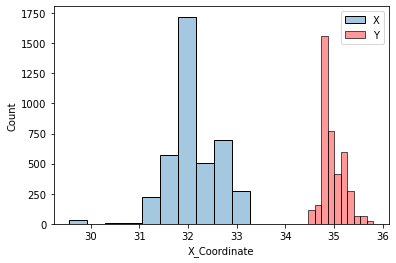

In [47]:
sns.histplot(df['X_Coordinate'],label='X',alpha=0.4,bins=10)
sns.histplot(df['Y_Coordinate'],color='red',label='Y',alpha=0.4,bins=10)
plt.legend()
plt.show()

In [ ]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['Y_Coordinate'],
        lat = df['X_Coordinate'],
        text = df['ATM_Address'],
        mode = 'markers',
        marker = dict(
        #size = df['Atm_Num'].groupby(df['City']).count()/5,
        opacity = 0.8,
        color=df['Bank_Name'],    
        autocolorscale = False,
        #symbol = 'square',
        line = dict(
            width=1,
            color='rgba(102, 102, 102)'
        )
   
        )))

fig.update_layout(
        title = 'ATM Locations',
        geo_scope='asia',
    )
fig.show()

In [48]:
import plotly.express as px

fig = px.scatter_geo(df, lon='Y_Coordinate',
                     lat='X_Coordinate',
                     color="Bank_Name", # which column to use to set the color of markers
                     hover_name="City", # column added to hover information
                     #size="pop", # size of markers,
                     scope='asia')
                
fig.show()

In [49]:
df[['City','X_Coordinate','Y_Coordinate']].groupby('City').mean()

,X_Coordinate,Y_Coordinate
City,,
אבו גוש,31.805580,35.114750
אבן יהודה,32.269704,34.888544
אום אל-פחם,32.524347,35.153009
אופקים,31.317326,34.621544
אור יהודה,32.025092,34.857904
...,...,...
שערי תקווה,32.119496,35.028798
שפרעם,32.806380,35.169517
תל אביב -יפו,32.075685,34.786538


In [50]:
df_grouped=pd.concat([df[['City','Atm_Num']].groupby('City').count(),df[['City','X_Coordinate','Y_Coordinate']].groupby('City').mean()],axis=1)
df_grouped.describe()

,Atm_Num,X_Coordinate,Y_Coordinate
count,181.000000,181.000000,181.000000
mean,22.298343,32.279568,35.060964
std,45.819082,0.588939,0.238672
min,1.000000,29.592445,34.574845
25%,4.000000,31.928171,34.879023
50%,9.000000,32.269704,35.020358
75%,22.000000,32.788025,35.219728
max,379.000000,33.282851,35.689572


In [86]:
import folium
from folium import ColorMap, LinearColormap
m = folium.Map(location=[32.012404,34.752276],zoom_start=7)
linear = LinearColormap(colors=['purple','red'], vmin=0.0, vmax=380.)
colormap = ColorMap(0,380)
for index,row in df_grouped.iterrows():
    folium.Marker(location=[row.X_Coordinate,row.Y_Coordinate],
                        #radius=(np.log(row.Atm_Num)+1),
                        icon=folium.Icon(color="red",icon='fa-credit-card', prefix='fa'),
                        #icon=folium.Icon('fa-credit-card',
                        #prefix='fa',
                        size=row.Atm_Num,
                        tooltip=f'{index}, \n{int(row.Atm_Num)} כספומטים',
                        #color='red')
                  #linear(row.Atm_Num),
                        fill_opacity=0.3
                         ).add_to(m)

#m.add_child(linear)
display(m)

In [81]:
m2 = folium.Map(location=[32.012404,34.752276],zoom_start=7)
linear = LinearColormap(colors=['purple','red'], vmin=0.0, vmax=380.)
colormap = ColorMap(0,380)
for index,row in df_grouped.iterrows():
    folium.CircleMarker(location=[row.X_Coordinate,row.Y_Coordinate],
                        radius=(np.log(row.Atm_Num)+1),
                        tooltip=f'{index}, \n{int(row.Atm_Num)} כספומטים',
                        color=linear(row.Atm_Num),
                        fill_color=linear(row.Atm_Num),
                        fill_opacity = 0.7,
                        line_opacity = 0.1
                         ).add_to(m2)

m2.add_child(linear)
display(m2)

In [104]:
px.histogram(df,x='Bank_Name',title="Count of ATMs by Bank",labels='Bank',color='ATM_Location',opacity=0.4)

In [125]:
#df[['Branch_Code','Bank_Name','Atm_Num']].groupby('Bank_Name').mean('Atm_Num')
df[df['Branch_Code']==911]

,Bank_Code,Bank_Name,Branch_Code,Atm_Num,ATM_Address,City,Commission,ATM_Type,ATM_Location,Handicap_Access,X_Coordinate,Y_Coordinate
2504,10,"בנק לאומי לישראל בע""מ",911,9114,ישעיהו 28,ירושלים,לא,מכשיר מידע/או מתן הוראות,בתוך הסניף,כן,31.787908,35.218414
2643,10,"בנק לאומי לישראל בע""מ",911,9112,ישעיהו 28,ירושלים,לא,מכשיר מידע/או מתן הוראות,על קיר הסניף,כן,31.787908,35.218414
2646,10,"בנק לאומי לישראל בע""מ",911,9115,ישעיהו 28,ירושלים,לא,מכשיר מידע/או מתן הוראות,בתוך הסניף,כן,31.787908,35.218414
2677,10,"בנק לאומי לישראל בע""מ",911,9111,ישעיהו 28,ירושלים,לא,משיכת מזומן,על קיר הסניף,כן,31.787908,35.218414
2754,10,"בנק לאומי לישראל בע""מ",911,9113,ישעיהו 28,ירושלים,לא,מכשיר מידע/או מתן הוראות,בתוך הסניף,כן,31.787908,35.218414
3035,10,"בנק לאומי לישראל בע""מ",911,9117,ישעיהו 28,ירושלים,לא,משיכת מזומן,על קיר הסניף,כן,31.787908,35.218414
3183,10,"בנק לאומי לישראל בע""מ",911,9116,ישעיהו 28,ירושלים,לא,משיכת מזומן,על קיר הסניף,לא,31.787908,35.218414


In [130]:
cities=pd.read_excel('datasets/bycode2019-2.xlsx')
cities[cities['שם יישוב']=='ירושלים']

,שם יישוב,סמל יישוב,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2019,...,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,קואורדינטות,גובה ממוצע,ועדת תכנון,מרחב משטרה,שנה,שם יישוב באנגלית,אשכול רשויות מקומיות
647,ירושלים,3000,JERUSALEM,1,11,111.0,0.0,410.0,4.0,936425.0,...,ותיק,120,NaN,2.209463e+09,715.0,101.0,10002489.0,2019,Jerusalem,NaN


In [184]:
cities[cities['מעמד מונציפאלי']==0]

,שם יישוב,סמל יישוב,תעתיק,מחוז,נפה,אזור טבעי,מעמד מונציפאלי,שיוך מטרופוליני,דת יישוב,סך הכל אוכלוסייה 2019,...,שנת ייסוד,צורת יישוב שוטפת,השתייכות ארגונית,קואורדינטות,גובה ממוצע,ועדת תכנון,מרחב משטרה,שנה,שם יישוב באנגלית,אשכול רשויות מקומיות
36,אום אל-פחם,2710,UMM AL-FAHM,3,32,323.0,0.0,NaN,2.0,56108.0,...,NaN,250,NaN,2.145071e+09,309.0,354.0,10004249.0,2019,Umm al-Fahm,NaN
41,אופקים,31,OFAQIM,6,62,622.0,0.0,NaN,1.0,30663.0,...,1955,160,NaN,1.638358e+09,141.0,601.0,10001893.0,2019,Ofaqim,620.0
44,אור יהודה,2400,OR YEHUDA,5,52,512.0,0.0,122.0,1.0,36813.0,...,1950,160,NaN,1.863266e+09,29.0,510.0,10001516.0,2019,Or Yehuda,NaN
45,אור עקיבא,1020,OR AQIVA,3,32,324.0,0.0,NaN,1.0,18972.0,...,1951,170,NaN,1.927171e+09,15.0,353.0,10004261.0,2019,Or Aqiva,NaN
155,אילת,2600,ELAT,6,62,625.0,0.0,NaN,1.0,52300.0,...,1951,150,NaN,1.941739e+09,164.0,602.0,10001955.0,2019,Elat,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,רמת השרון,2650,RAMAT HASHARON,5,51,511.0,0.0,121.0,1.0,47246.0,...,1923,160,NaN,1.851967e+09,39.0,553.0,10001605.0,2019,Ramat HaSharon,NaN
1352,רעננה,8700,RA'ANNANA,4,42,421.0,0.0,131.0,1.0,75422.0,...,1921,150,NaN,1.879268e+09,48.0,416.0,10002133.0,2019,Ra'annana,410.0
1386,שדרות,1031,SEDEROT,6,61,614.0,0.0,NaN,1.0,27635.0,...,1951,160,NaN,1.614960e+09,89.0,611.0,10001829.0,2019,Sederot,620.0
1431,שפרעם,8800,SHEFAR'AM,2,24,241.0,0.0,241.0,2.0,42136.0,...,NaN,260,NaN,2.164075e+09,137.0,261.0,10004497.0,2019,Shefar'am,310.0


In [137]:
df=df.merge(cities[['סך הכל אוכלוסייה 2019','דת יישוב','שם יישוב']],left_on='City',right_on='שם יישוב',how='left').drop('שם יישוב',axis=1)

In [185]:
byCity=df[['City','Atm_Num']].groupby('City').count()
byCity=byCity.merge(cities[['מחוז','סך הכל אוכלוסייה 2019','דת יישוב','שם יישוב','מעמד מונציפאלי']],left_index=True,right_on='שם יישוב',how='left')

In [180]:
byCity[byCity['שם יישוב']=='תל אביב -יפו']

,Atm_Num,סך הכל אוכלוסייה 2019,דת יישוב,שם יישוב
1447.0,368,460613.0,4.0,תל אביב -יפו


In [186]:
px.histogram(byCity,x='שם יישוב',y=(byCity['סך הכל אוכלוסייה 2019']/byCity['Atm_Num']),color=byCity['מחוז'])